<a href="https://colab.research.google.com/github/SINDHUSITA/100DaysOfMLCode/blob/master/Time%20Series%20-%20Avocado%20Pricing/Predict_Future_Prices_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



## Import Libraries and Dataset


In [10]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [11]:
# dataframes creation for both training and testing datasets 
dataset = pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [12]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [14]:
dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [16]:
dataset.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Exploring Dataset 

In [17]:
dataset = dataset.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


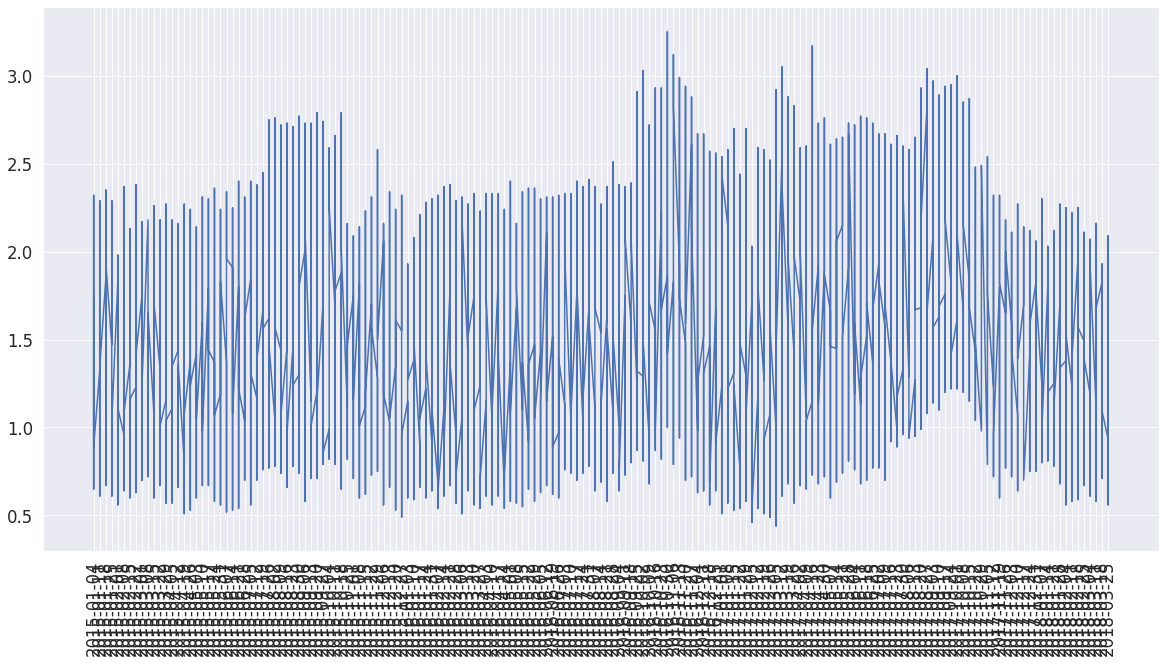

In [44]:
# Plot date and average price
plt.figure(figsize = (20,10))
# plt.xticks(rotation=90)
plt.plot(dataset['Date'],dataset['AveragePrice'])

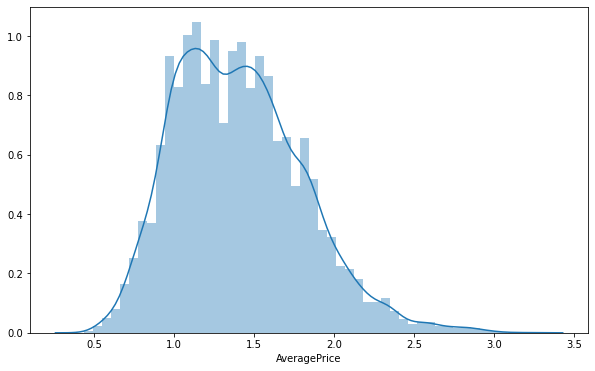

In [19]:
# Plot distribution of the average price
plt.figure(figsize=(10,6))
sns.distplot(dataset['AveragePrice'])

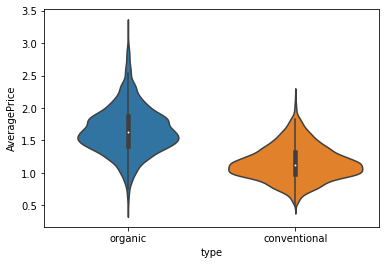

In [20]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y='AveragePrice',x='type',data=dataset)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

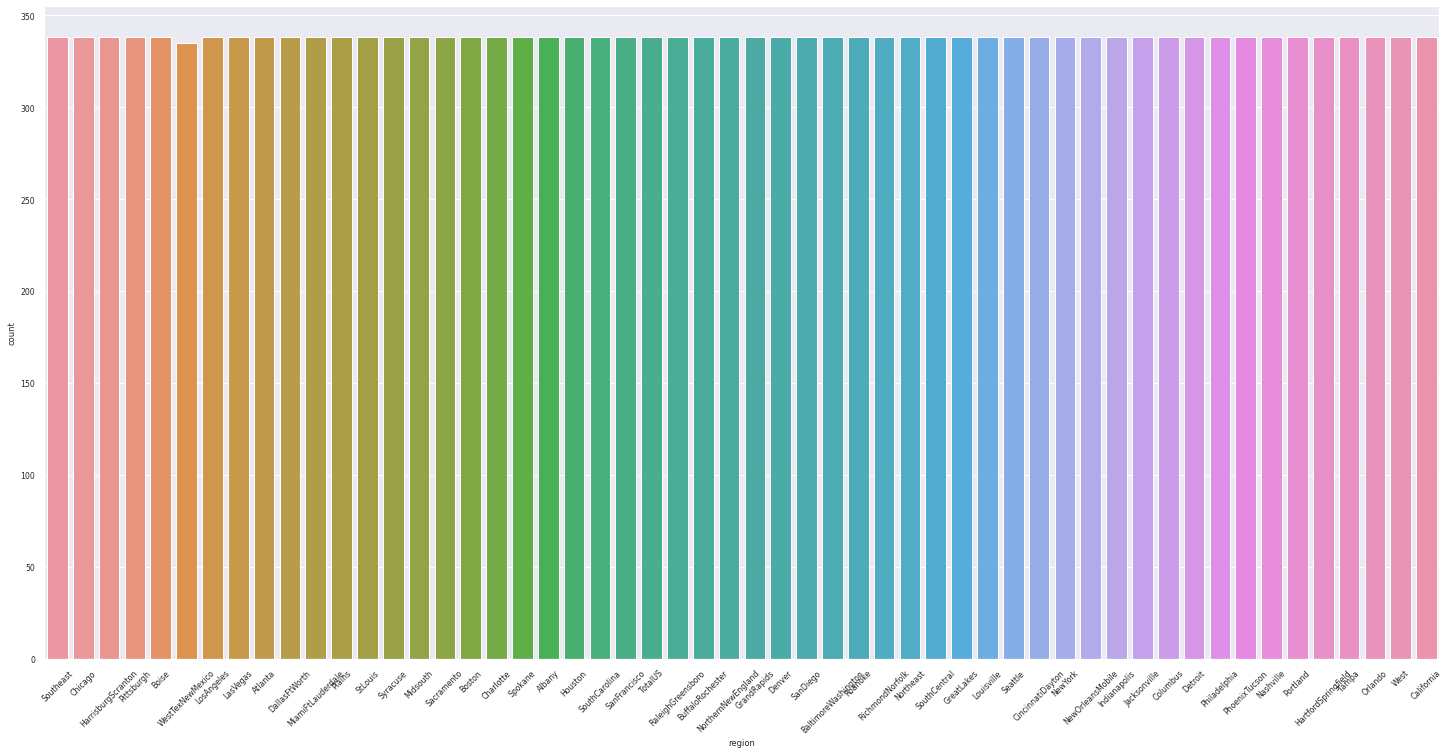

In [21]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = dataset)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

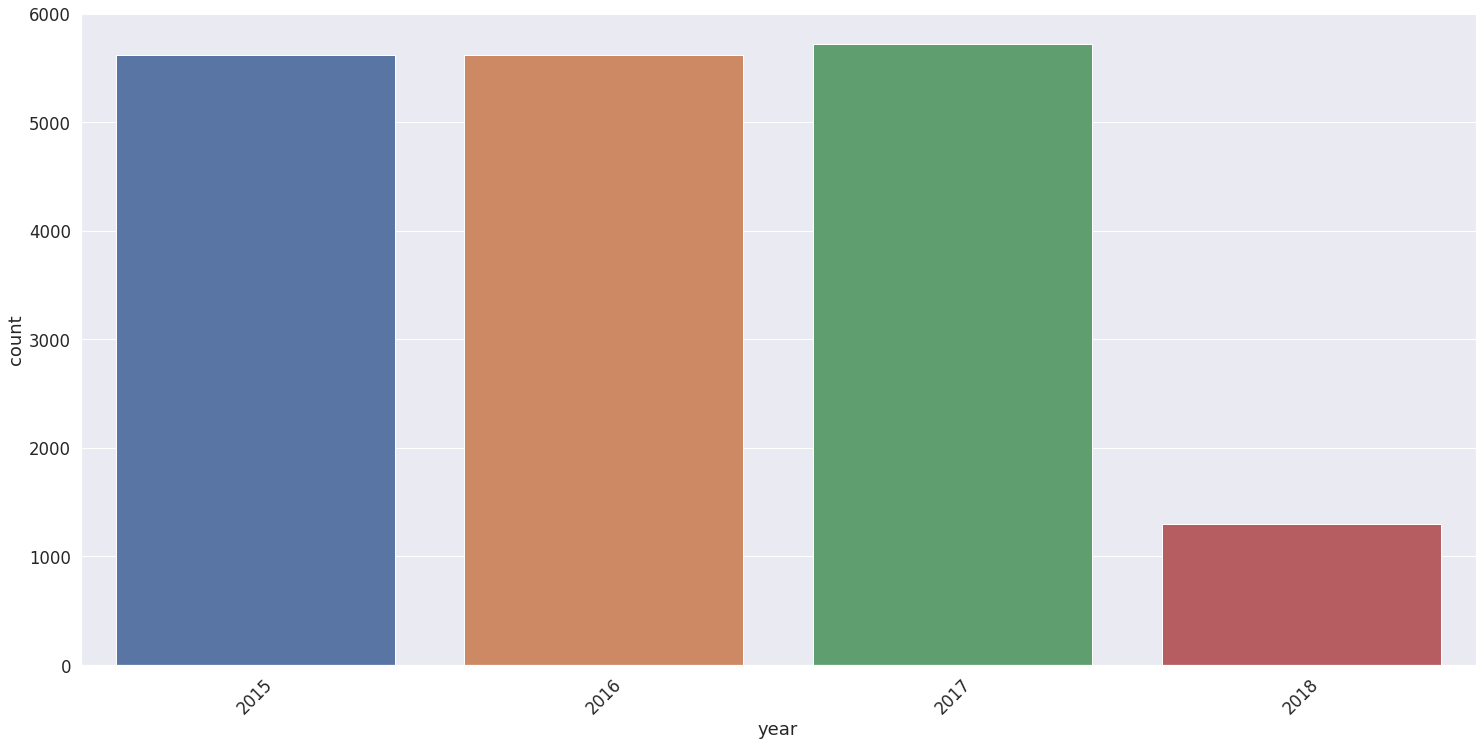

In [22]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = dataset)
plt.xticks(rotation = 45)

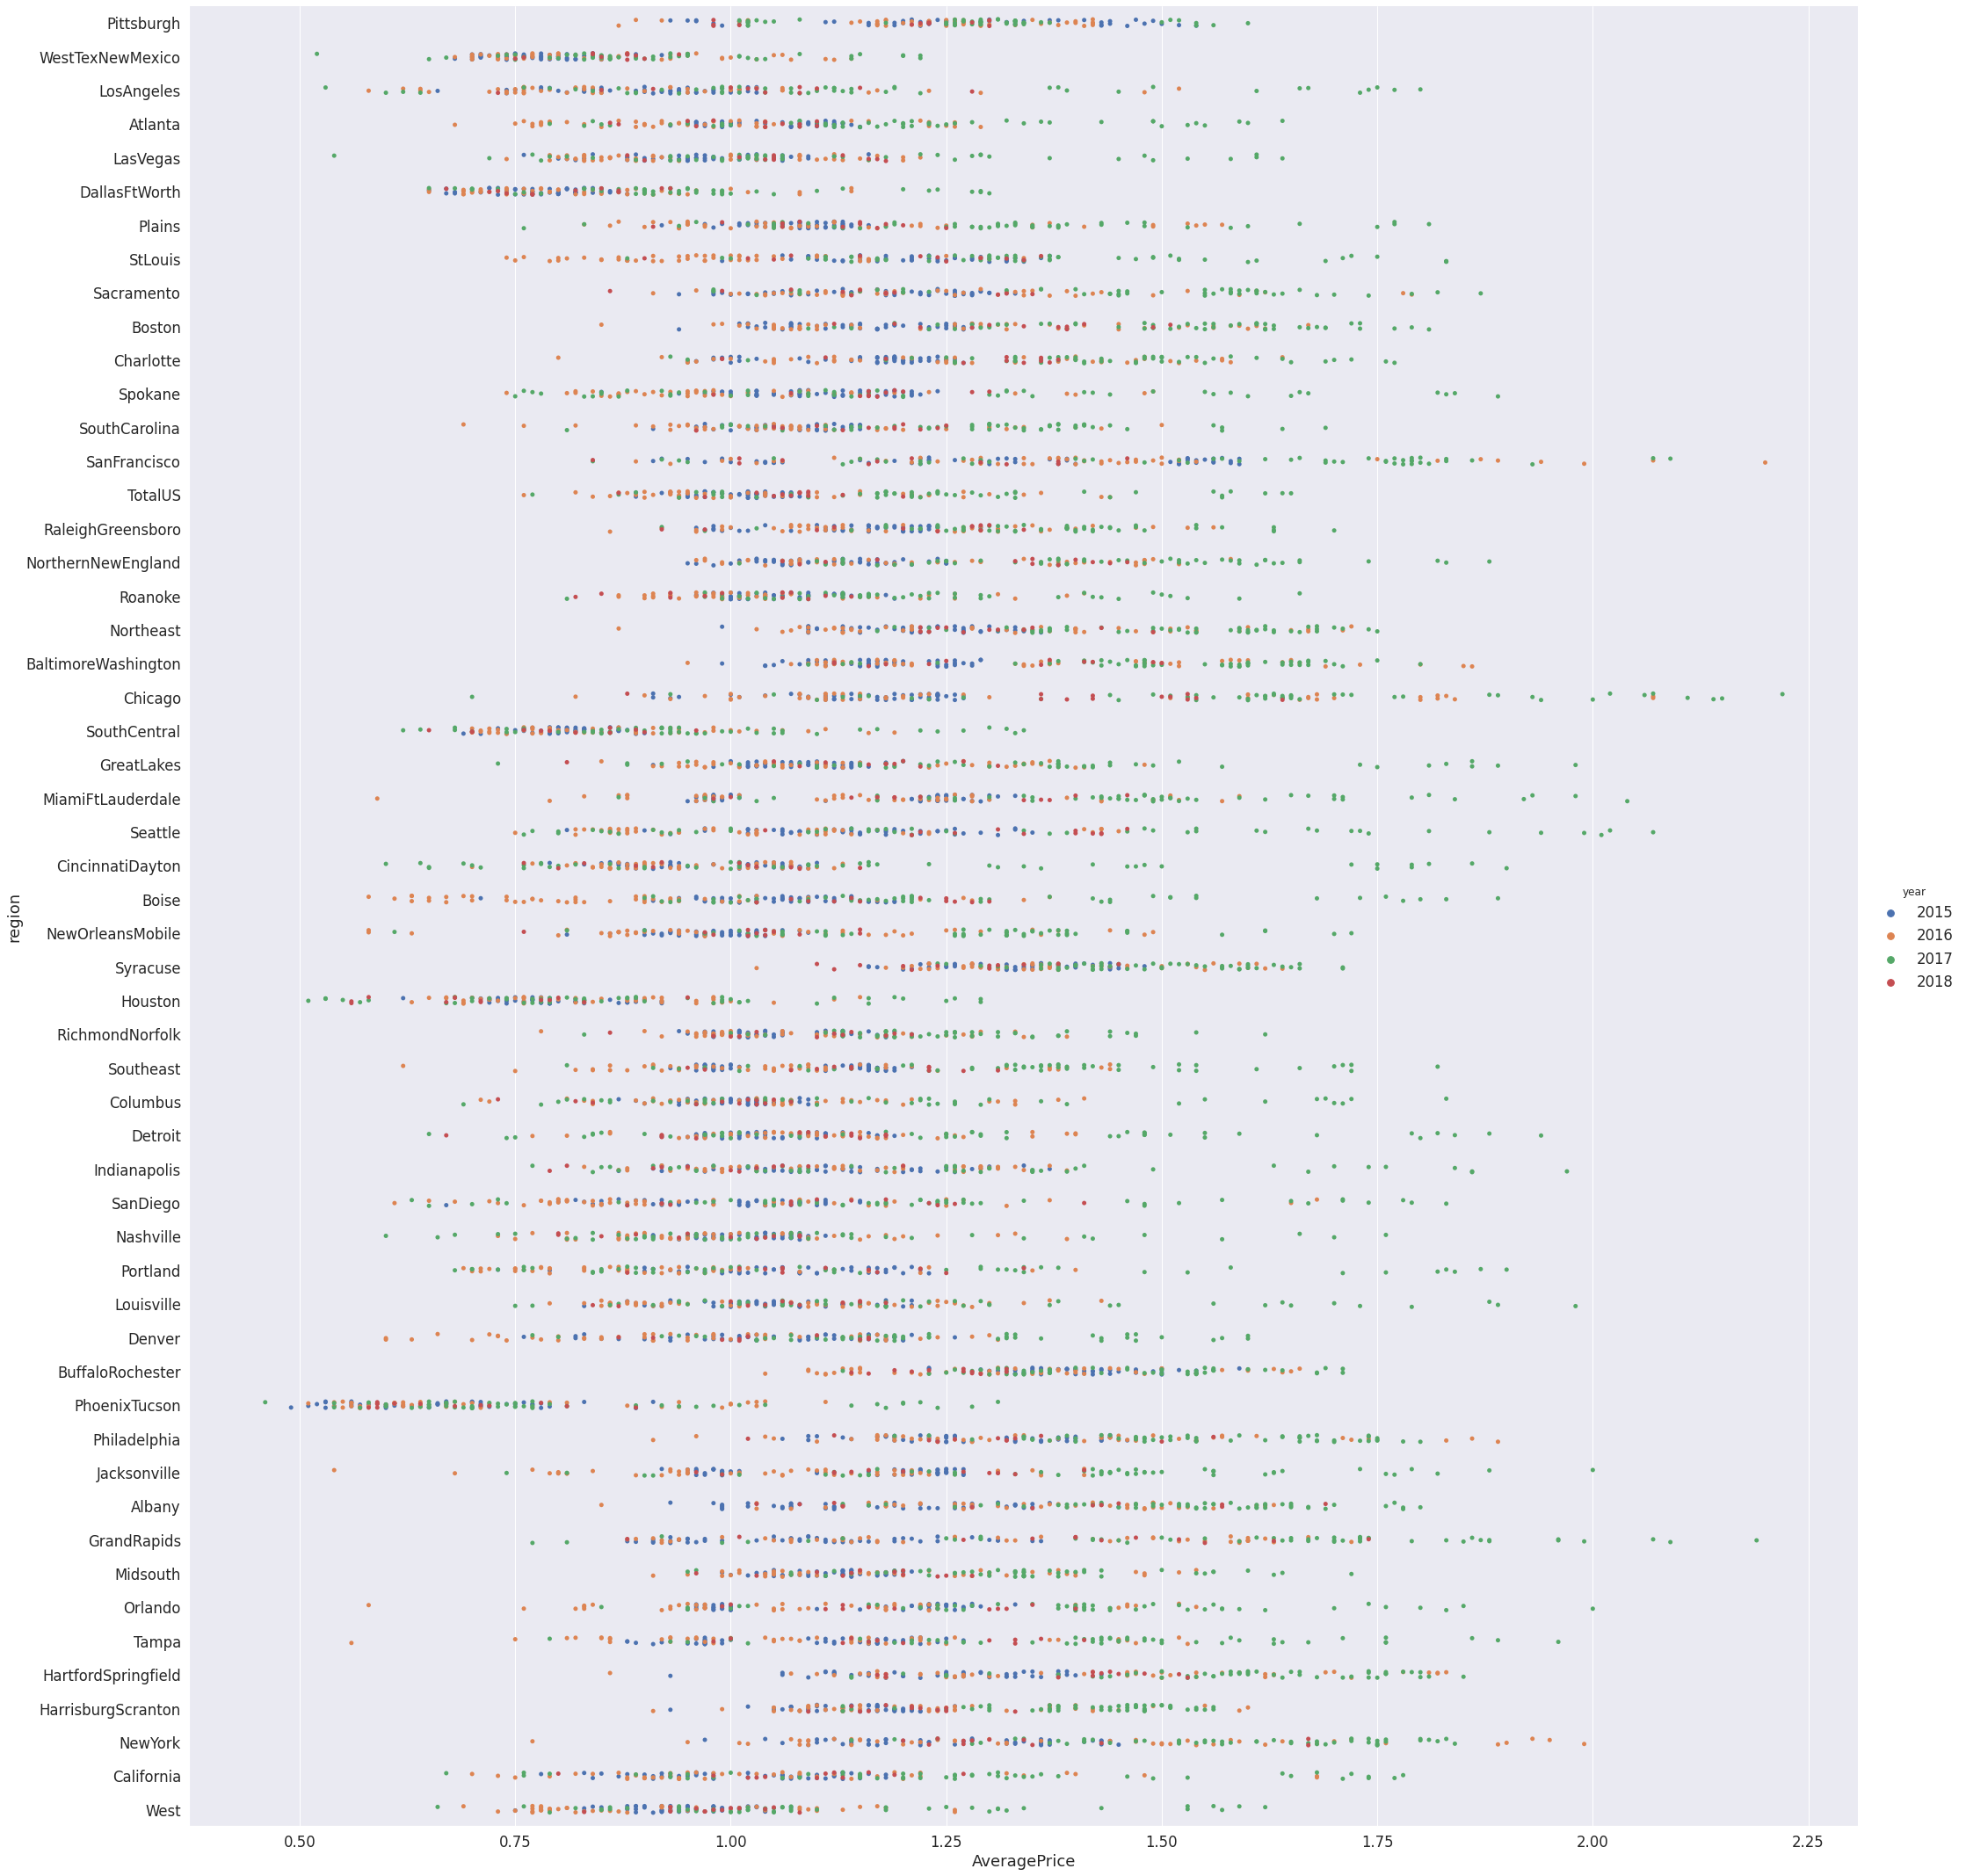

In [23]:
 # plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice','region',data = dataset[dataset['type']=='conventional'],
hue = 'year',
height = 30)

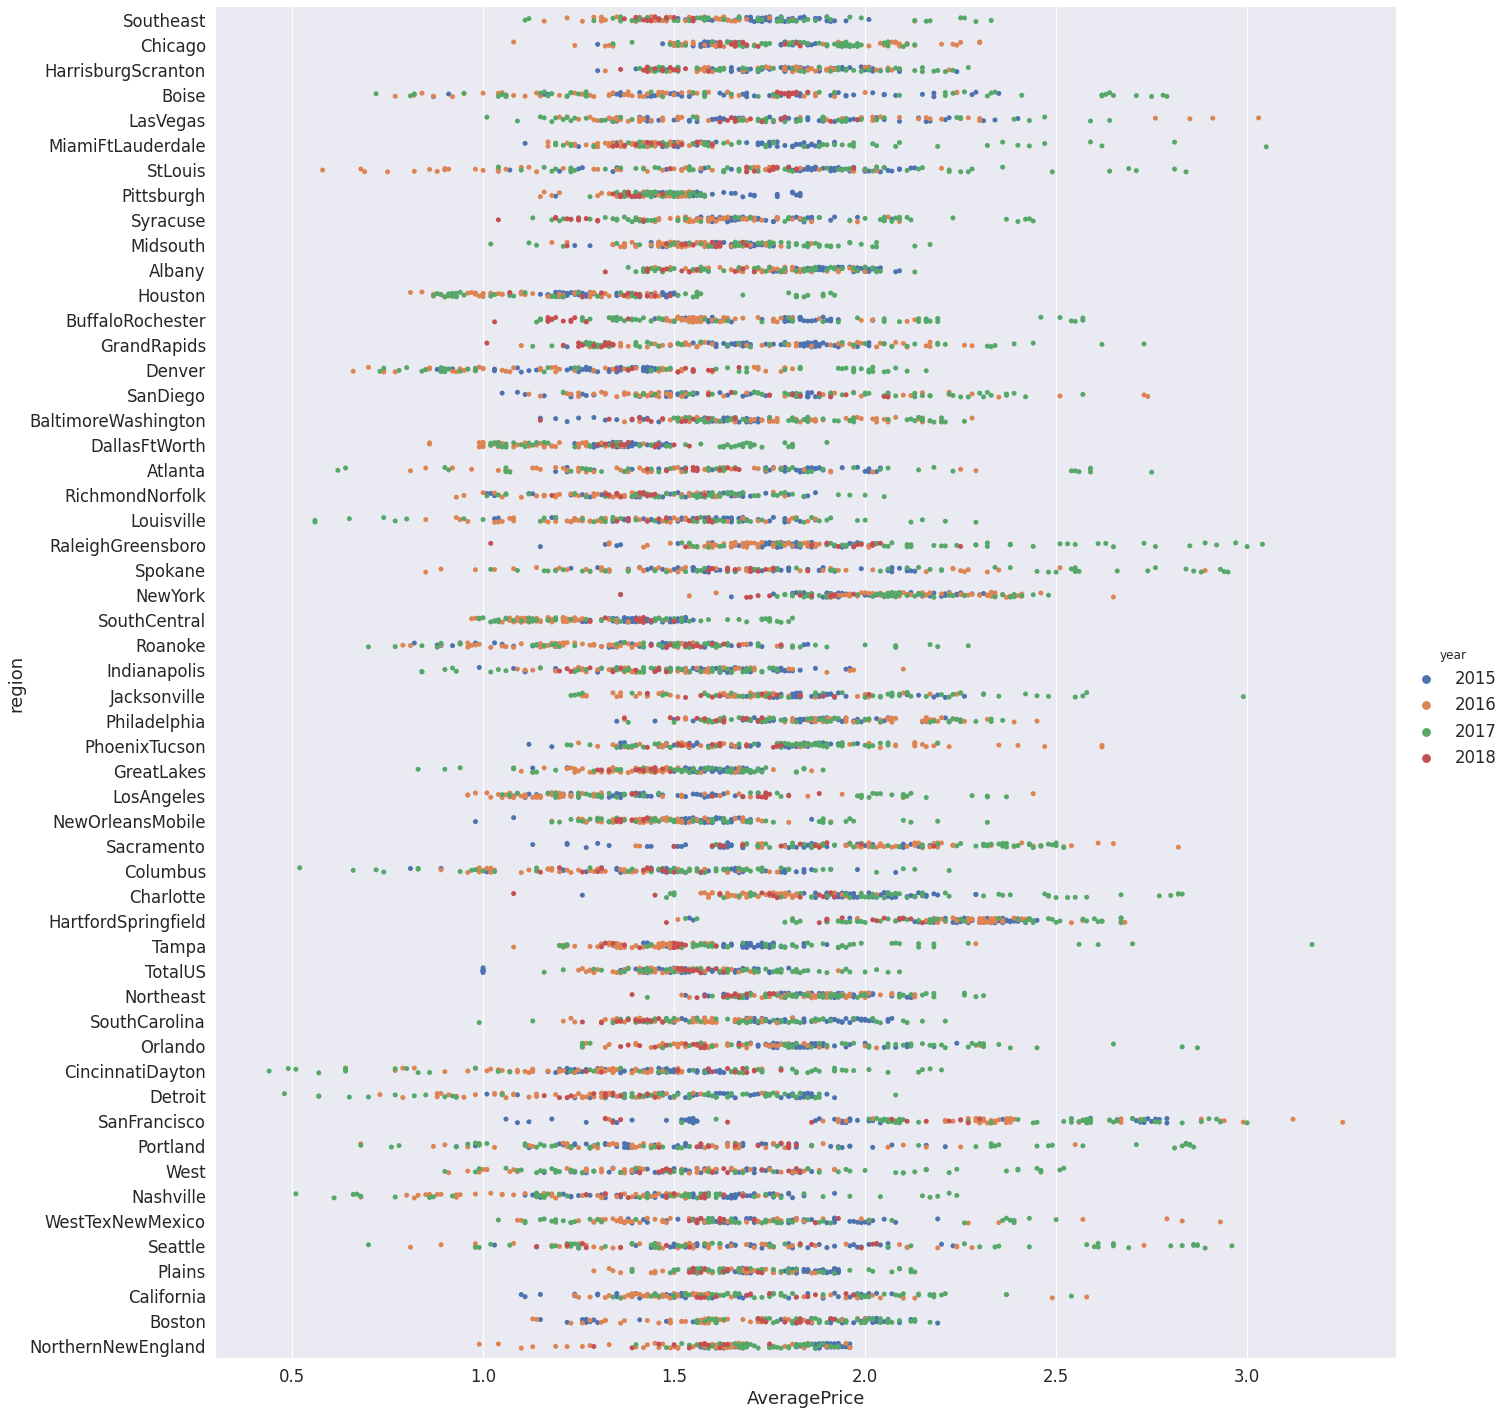

In [24]:
  # plot the avocado prices vs. regions for organic avocados
organic=sns.catplot('AveragePrice','region', data=dataset[dataset['type']=='organic'],hue='year',height=20)

## Preparing the data before applying Facebook Prophet tool

In [25]:
data = dataset.iloc[:,1:3]
data.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [26]:
data = data.rename(columns = {'Date':'ds','AveragePrice':'y'})
data.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


## Developing Model and making predictions - PART A

In [27]:
fb = Prophet()
fb.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Forcasting into the future
future = fb.make_future_dataframe(periods=365)
forecast = fb.predict(future)

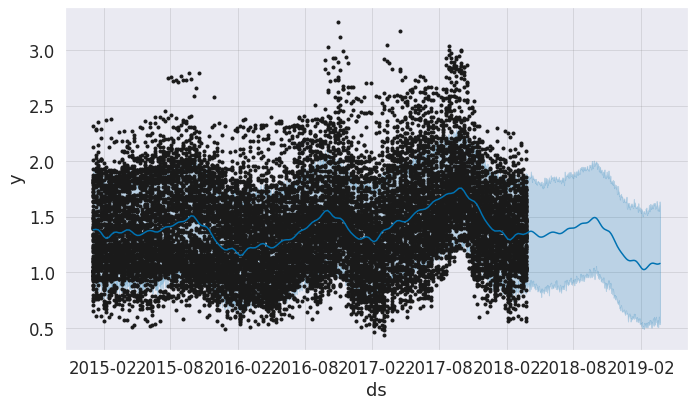

In [29]:
figure = fb.plot(forecast)

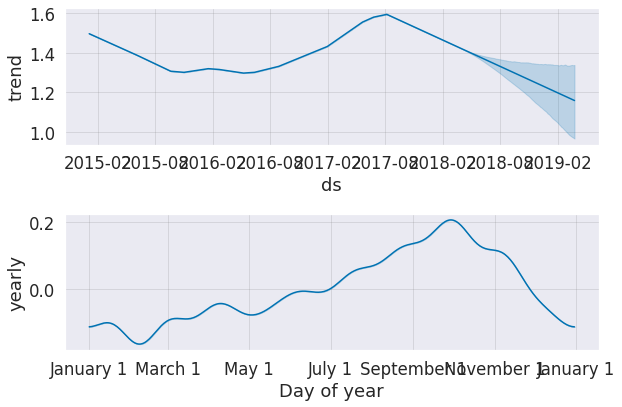

In [30]:
figure2 = fb.plot_components(forecast)

## Developing Model and making Predictions (Region Specific) - PART B

In [31]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

In [32]:
# Selecting specific region
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [33]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


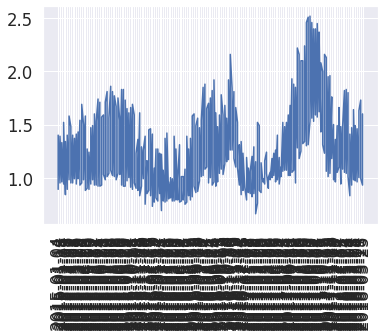

In [34]:
plt.xticks(rotation=90)
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [35]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [36]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


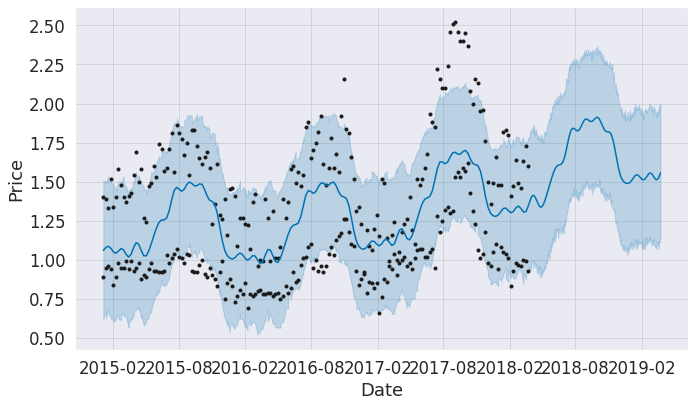

In [37]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

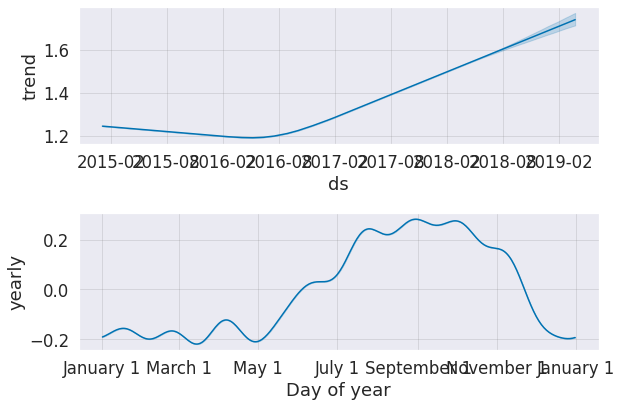

In [38]:
figure3 = m.plot_components(forecast)

##END